In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch
import random
import numpy as np

In [2]:
def test(cfg, env, agent, interval_times, noise=False):
    print("开始测试！")
    rewards = []  # 记录所有回合的奖励
    steps = []
    if noise:
        agent.actor.train()
    else:
        agent.actor.eval()
    for i_ep in range(cfg.test_eps):
        ep_reward = 0  # 记录一回合内的奖励
        ep_step = 0
        action = 0
        state = env.reset()  # 重置环境，返回初始状态
        for i in range(cfg.max_steps):
            ep_step+=1
            if i % interval_times == 0:
                next_state, reward, done, _ = env.step(env.action_space.sample())
            else:
                action = agent.predict_action(state)  # 选择动作
                next_state, reward, done, _ = env.step(action)  # 更新环境，返回transition
            state = next_state  # 更新下一个状态
            ep_reward += reward  # 累加奖励
            if done:
                break
        steps.append(ep_step)
        rewards.append(ep_reward)
        print(f"回合：{i_ep+1}/{cfg.test_eps}，奖励：{ep_reward:.2f}")
    agent.actor.train()
    print("完成测试")
    env.close()
    return rewards

In [3]:
# 获取参数
cfg = Config() 
# 训练
env, agent = env_agent_config(cfg)
agent = torch.load('./Data/CartPole-v0-StateAttention-Noise/60-600.pt')

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：4，动作空间维度：2


开始测试！
回合：1/20，奖励：200.00
回合：2/20，奖励：200.00
回合：3/20，奖励：200.00
回合：4/20，奖励：200.00
回合：5/20，奖励：200.00
回合：6/20，奖励：129.00
回合：7/20，奖励：200.00
回合：8/20，奖励：200.00
回合：9/20，奖励：200.00
回合：10/20，奖励：200.00
回合：11/20，奖励：113.00
回合：12/20，奖励：117.00
回合：13/20，奖励：200.00
回合：14/20，奖励：200.00
回合：15/20，奖励：149.00
回合：16/20，奖励：113.00
回合：17/20，奖励：183.00
回合：18/20，奖励：200.00
回合：19/20，奖励：200.00
回合：20/20，奖励：147.00
完成测试
177.55 33.68007571250397


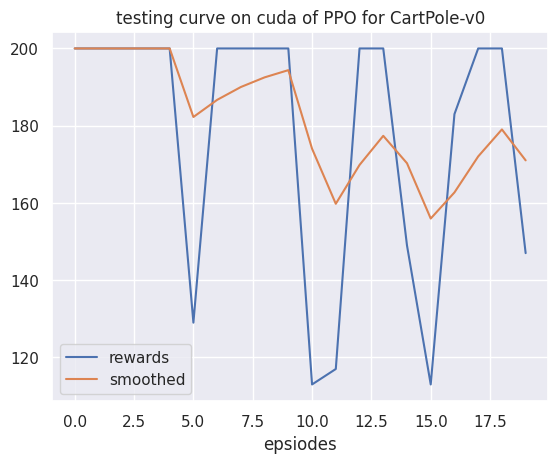

In [7]:
rewards = test(cfg, env, agent, interval_times=3, noise=True)
plot_rewards(rewards, cfg, tag="test")
arr = np.array(rewards)
print(arr.mean(), arr.std())

tensor([[[[4.7032e-08, 1.2250e-07, 1.2500e-01, 2.2573e-07, 9.8031e-08,
           1.4530e-07, 1.3770e-06, 5.7925e-07]]]])

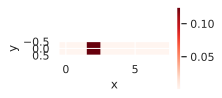

In [6]:
d2l.show_heatmaps(agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
agent.actor.atten.view(1, 1, 1, 8).cpu()